In [1]:
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib[:rcParams][:"svg.image_noscale"]=false

false

In [2]:
CSD=load("CSDEvocada.jld", "CSD")
CSDPlanchado=load("CSDEvocada.jld", "CSDPlanchada")
CSDPromedio=CSD["Trancazo_1"]+CSD["Trancazo_2"]+CSD["Trancazo_3"]
CSDPlanchadoPromedio=CSDPlanchado["Trancazo_1"]+CSDPlanchado["Trancazo_2"]+CSDPlanchado["Trancazo_3"];

In [3]:
#Las esquinas del cuadro
xizq=22
xder=48
ybajo=4
yalto=30
retraso=35
tmax=size(CSDPromedio)[3]
tiemposinteresantes=(63,70,77,84,91,98)

(63,70,77,84,91,98)

In [4]:
CatenarioPositivo=load("CatenariosEvocados-Promedio-3.jld", "CatenarioPositivo")
CatenarioNegativo=load("CatenariosEvocados-Promedio-3.jld", "CatenarioNegativo");

In [2]:
cuadro=91

CSDEjemplo=CSDPromedio[:,:,cuadro];
map!(x->abs(x)<10? 0:x, CSDEjemplo)

PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>16)
seg=round((cuadro-35)/7022, 1)
titulo="$seg ms"
figure(figsize=(4,3.5))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)
limcsd=180

otraimagen=imshow(CSDEjemplo, cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="nearest", extent=[1,64,1,64])

cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04)
farofa=cb[:set_ticklabels](["Sink", "Source"])


EjemploCentrosCSDPos=readdlm("CenterOfMassCollector/CMFuentes-$cuadro.dat")
xxpos=EjemploCentrosCSDPos[:,1]+xizq
yypos=EjemploCentrosCSDPos[:,2]+ybajo
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("CenterOfMassCollector//CMPozos-$cuadro.dat")
xxneg=EjemploCentrosCSDNeg[:,1]+xizq
yyneg=EjemploCentrosCSDNeg[:,2]+ybajo
valorneg=EjemploCentrosCSDNeg[:,3];

scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")

scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="green", edgecolors="black")

tick_params(axis="both", labelsize=14)

title(titulo, fontdict=font1)
 #tight_layout()
#savefig("CSDParaDisjoint-$cuadro.svg", dpi=90)
PyPlot.close_queued_figs()

LoadError: LoadError: UndefVarError: CSDPromedio not defined
while loading In[2], in expression starting on line 3

In [8]:
Componentes91=readdlm("ComponenteCollector/CompNeg-91.dat");
SubDatos=CSDPromedio[ybajo:yalto, xizq:xder,1:tmax];

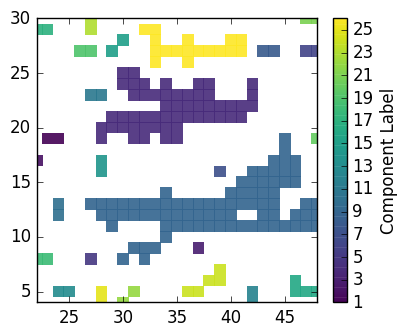

In [9]:

figure(figsize=(4.0,3.55))

font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>24)
limcsd=180

milisec=round((cuadro-retraso)/7.022,1)

 #title("t= $milisec ms", fontdict=font1)

PyPlot.xlim(xizq,xder)
PyPlot.ylim(ybajo,yalto)
#otraimagen=imshow(SubDatos, cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
#interpolation="nearest", extent=[xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5])
xxpos=Componentes91[:,1]+xizq-1
    yypos=Componentes91[:,2]+ybajo-1
colores=Componentes91[:,4]
normcolor=maximum(colores)
colorete=colores/normcolor
pinpun=scatter(xxpos,yypos,c=colores,cmap="viridis", linewidth=0,marker="s",alpha=0.9, s=70)
cb=colorbar(pinpun,fraction=0.046, ticks=1:2:26)
cb[:set_label]("Component Label")
#savefig("ComponentesNegativosEtiquetados-$cuadro.svg",dpi=90)

In [10]:
SubPos=map(x->x>15?x:0,SubDatos);
SubNeg=map(x->x<-15?x:0,SubDatos);

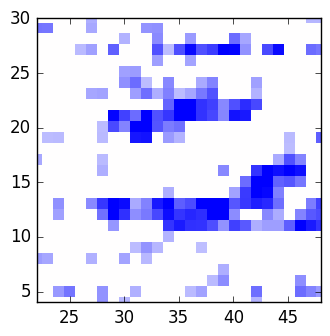

In [11]:

figure(figsize=(4.0,3.55))
limcsd=60
PyPlot.xlim(xizq,xder)
PyPlot.ylim(ybajo,yalto)
otraimagen=imshow(SubNeg[:,:,91], cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="nearest", extent=[xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5])

cb[:set_label]("Component Label")
#savefig("ComponentesNegativos-$cuadro.svg",dpi=90)

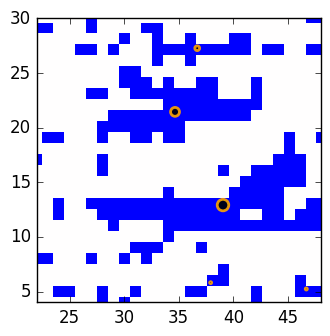

PyObject <matplotlib.collections.PathCollection object at 0x7f00f82eda58>

In [12]:

figure(figsize=(4.0,3.55))
limcsd=10
PyPlot.xlim(xizq,xder)
PyPlot.ylim(ybajo,yalto)
otraimagen=imshow(SubNeg[:,:,91], cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="nearest", extent=[xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5])

EjemploCentrosCSDPos=readdlm("CenterOfMassCollector/CMFuentes-$cuadro.dat")
xxpos=EjemploCentrosCSDPos[:,1]+xizq-1
yypos=EjemploCentrosCSDPos[:,2]+ybajo-1
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("CenterOfMassCollector//CMPozos-$cuadro.dat")
xxneg=EjemploCentrosCSDNeg[:,1]+xizq-1
yyneg=EjemploCentrosCSDNeg[:,2]+ybajo-1
valorneg=EjemploCentrosCSDNeg[:,3];

#scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
#scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")

#scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="black", edgecolors="orange", lw=2)

#savefig("ComponentesNegativosyCM-$cuadro.svg",dpi=90)

In [13]:
ioff()

ImagenCSD=SubDatos[:,:,70];

figure(figsize=(6,6))
#axis("equal")
tick_params(labelbottom="on", labelleft="on")
xticks(fontsize=20)
yticks(fontsize=20)
xlim(xizq-0.50,xder+0.5)
ylim(ybajo-0.5,yalto+0.5)
bolitasrojas=0
bolitasazules=0
minlargo=3
marcagor=300
muevemin=0.5
limcsd=180
tight_layout()

guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="sinc", 
origin="lower", vmin=-limcsd, vmax=limcsd, extent=[xizq,xder,ybajo,yalto])

for p in CatenarioPositivo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]+xizq
        yypos=p[:,2]+ybajo    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=2)
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
        linewidth=1,
        facecolor="maroon", marker="o" )
        finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="black", 
        linewidth=1,facecolor="maroon", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
       # annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)>marcagor && (desviax>muevemin || desviay > muevemin) &&longus> minlargo
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]+xizq
        yypos=p[:,2]+ybajo    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="midnightblue", lw=2)
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
        linewidth=1,
        facecolor="midnightblue", alpha=0.7, marker="o", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="black", 
        linewidth=1,
        facecolor="midnightblue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

savefig("TrayectoriasEvocadasCompletasMayores300-01.svg",dpi=90)

In [15]:
function AntesQue(Datos::Array, tiempo)
    Cadena=[0 0 0 0]
    for a in eachindex(Datos[:,4])
        if Datos[a,4]+40<tiempo
            Cadena=vcat(Cadena, Datos[a,:])
    end
end
    Cadena=Cadena[2:end,:]
    return Cadena
end

AntesQue (generic function with 1 method)

In [18]:
ioff()

for cuadro in tiemposinteresantes

ImagenCSD=SubDatos[:,:,cuadro];

figure(figsize=(4,3.5))
#axis("equal")
 
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>24)
limcsd=180

milisec=round((cuadro-retraso)/7.022,1)

title("t= $milisec ms", fontdict=font1)
   
    
tick_params(labelbottom="on", labelleft="on")
xticks(fontsize=20)
yticks(fontsize=20)
xlim(xizq-0.50,xder+0.5)
ylim(ybajo-0.5,yalto+0.5)
bolitasrojas=0
bolitasazules=0
minlargo=4
marcagor=300
muevemin=0.5
limcsd=180
tight_layout()

    guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="sinc", 
origin="lower", vmin=-limcsd, vmax=limcsd, extent=[xizq,xder,ybajo,yalto])

for p in CatenarioPositivo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    paux=AntesQue(p,cuadro)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
        frase=(mean(gordura)> marcagor && longus>minlargo &&
            (desviax>muevemin || desviay>muevemin) &&cucho>0)
     #   println(longus, " ", minlargo," ", frase)
       
        if frase
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]+xizq-1
        yypos=paux[:,2]+ybajo-1
            gordis=abs(map(Float32, paux[:,3]))
        tiempos=round((paux[:,4]-retraso+40)/7.022,1)   
        plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=4)
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
        linewidth=1,
        facecolor="maroon", marker="o" )
            finales=scatter(xxpos[end],yypos[end], s=120, edgecolors="orangered", 
        linewidth=2,facecolor="maroon", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(tiempos[end], (xxpos[end], yypos[end]), fontsize=15, color="green")
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
    end

end




for p in CatenarioNegativo
    gordura=abs(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    
    paux=AntesQue(p,cuadro)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
        
        if mean(gordura)>marcagor && longus>minlargo &&
            (desviax>muevemin || desviay > muevemin) && cucho>0
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]+xizq
        yypos=paux[:,2]+ybajo    
        gordis=abs(map(Float32, paux[:,3]))
  
            #  tiempos= round(paux[:,4]-retraso)/7.022,1)   
        plot(xxpos, yypos, marker="o", markersize=1, color="midnightblue", lw=4)
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
        linewidth=1,
        facecolor="midnightblue", alpha=0.7, marker="o", label="Final" )
            finales=scatter(xxpos[end],yypos[end], s=120, edgecolors="slateblue", 
        linewidth=2,
        facecolor="midnightblue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")
      #      scatter(xxpos[end],yypos[end], s=gordis*0.5, alpha=0.5,
      #      c="aquamarine", edgecolors="none")

    end
end

    savefig("CuadroTray-$cuadro.svg",dpi=90)
    
end

In [18]:
?zero

search: zero zeros spzeros nonzeros set_zero_subnormals get_zero_subnormals



```
zero(x)
```

Get the additive identity element for the type of `x` (`x` can also specify the type itself).
